In [3]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import pyqtgraph as pg
from pyqtgraph.Qt import QtCore, QtGui
from sklearn.linear_model import LinearRegression
import numpy as np
import os,sys
from statsmodels.regression import linear_model as sm
import statsmodels.api as sm2
%matplotlib inline
import matplotlib.cm as cm
cmap = cm.tab10
import random
from scipy import signal
import cmath
%load_ext autoreload
%autoreload 2
from scipy.signal import firwin, lfilter, filtfilt
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.path import Path
from matplotlib import patches
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLineCollection
import numpy as np
# questo lo usi se vuoi definire qualche colormap personalizzata, questa per esempio
# va dal blu all'arancione
colors = ["navy", "royalblue", "cornflowerblue", "lightsalmon", "coral", "orangered", "firebrick"]
nodes = [0.0, 1/6, 1/3, 1/2, 2/3, 5/6, 1]
my_cmap = LinearSegmentedColormap.from_list("my_cmap", list(zip(nodes, colors)))

class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import interp1d

/home/benny/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x = [1,2,3,4]*4
x = np.array(x).reshape(4,4)
for r,f in enumerate(x):
    print(r,f)

0 [1 2 3 4]
1 [1 2 3 4]
2 [1 2 3 4]
3 [1 2 3 4]


In [3]:
from statsmodels.tsa.stattools import acf
#aut = acf(sin, nlags = 1000)

In [1]:
def myautocorr(x, maxlag):
    autocorr= [0 for r in range(1,maxlag)]
    # così però non ho diviso in finestre...
    mu = np.mean(x)
    sd = np.std(x)
    for n in range(1,maxlag):
        autocorr[n-1] = (np.mean(x[n:]* x[:-n])-mu**2)/sd**2
    return np.array([1]+ autocorr)

In [2]:
def myfit(x,y, cutoff,cutoff2):
  x = x[cutoff:cutoff2]
  y = y[cutoff:cutoff2]
  fit = sm.OLS( y,np.vstack((np.ones(len(y)),x)).T).fit()
  print(fit.params[1])
  return fit.params[1], fit.params[0]

In [6]:
import colorednoise as cn

In [7]:

beta = 2 # the exponent
samples = 100000000 # number of samples to generate
brown = cn.powerlaw_psd_gaussian(beta, samples)

beta = 1# the exponent
samples = 1000000 # number of samples to generate
pink = cn.powerlaw_psd_gaussian(beta, samples)# vedere codice di questo modulo

In [4]:
import matplotlib

In [4]:
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=False)
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 25
pastel= cm.Pastel1(np.linspace(0,1,10))

In [5]:
plt.style.use('ggplot')

In [9]:
def my_moving_window(x, window=3, FUN=np.mean):

    """
    Calculates a moving estimate for a signal

    Args:
      x (numpy.ndarray): a vector array of size N
      window (int): size of the window, must be a positive integer
      FUN (function): the function to apply to the samples in the window
    Returns:
      (numpy.ndarray): a vector array of size N, containing the moving
      average of x, calculated with a window of size window
    """
    if len(x.shape) == 2:
        output = np.zeros(x.shape)
        for rown in range(x.shape[0]):
            output[rown, :] = my_moving_window(x[rown, :],window=window,FUN=FUN)                       
        return output
    output = np.zeros(x.size)
    for samp_i in range(x.size):
        values = []
        # loop through the window:
        for wind_i in range(int(1 - window), 1):
            if ((samp_i + wind_i) < 0) or (samp_i + wind_i) > (x.size - 1):
                # out of range
                continue
            # sample is in range and not nan, use it:
            if not(np.isnan(x[samp_i + wind_i])):
                values += [x[samp_i + wind_i]]
        # calculate the mean in the window for this point in the output:
        output[samp_i] = FUN(values)
    return output


In [66]:
lista = [r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_001.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_002.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_003.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_004.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_005.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_006.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_007.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_008.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_009.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_010.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_011.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_012.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_013.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_014.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_015.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_016.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_017.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_018.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_019.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_020.bin"]

timeseries =[]
for k in range(20):
    path = lista[k]
    width = 4    #columns
    heigth = 64   #rows
    nframes = 2000  #load  only some frames
    #n_words_to_load = heigth * width  * nframes
    n_words_to_load = -1  #load  all frames 
    raw = np.fromfile( path, dtype=np.double, count = n_words_to_load)  # count = -1 to load all data
    a = np.reshape(raw, (-1, width, heigth))
    a1 = []
    
    for z in range(9764):
        a1.append(np.delete(a[z],(0,1,2,3,4,5,6,7,8), axis = 1).transpose().tolist())
   
    a1 = np.asarray(a1)
    a1 = a1.reshape(-1,220)
    timeseries.append(a1)
    
timeseries = np.array(timeseries)
timeseries[:,:,60] = np.mean(timeseries, axis = 2)

In [12]:
cd '/home/benny/Desktop/Github/Criticality-in-barrel-cortex/'

/home/benny/Desktop/Github/Criticality-in-barrel-cortex


# Identifying "peaks"

In [13]:
from valanghe import *

In [14]:
intertempi = []
h= 0
for l in range(1):
    fs = 1/0.001
    nqy = fs/2
    down = 10/nqy
    up = 100/nqy
    a,b = signal.butter(2, down, 'highpass')
    filtered = signal.filtfilt(a,b,timeseries[l, 4000:], axis = 0)
    #filtered = timeseries[l]
    down = (13-5)/nqy
    up = (13+5)/nqy
    a,b = signal.butter(2, [down,up], 'bandpass')
    newfiltered = signal.filtfilt(a,b,filtered, axis = 0)
    binary = threshold(newfiltered,np.mean(newfiltered, axis = 0), np.std(newfiltered, axis =0),1, "neg")
    tempi = np.where(binary[:,80]>0)[0]
    inter = np.diff(tempi)
    h+= len(inter)
    intertempi += inter.tolist()

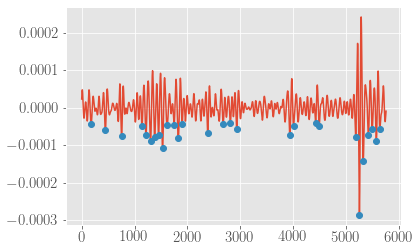

In [15]:
plt.plot(newfiltered[:,80])
plt.plot(np.arange(0,len(newfiltered[:,80]),1)[binary[:,80] > 0], newfiltered[:,80][binary[:,80] > 0], 'o')

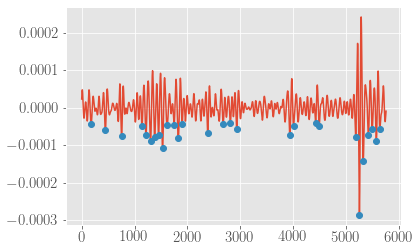

In [16]:
plt.plot(newfiltered[:,80])
plt.plot(np.arange(0,len(newfiltered[:,80]),1)[binary[:,80] > 0], newfiltered[:,80][binary[:,80] > 0], 'o')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


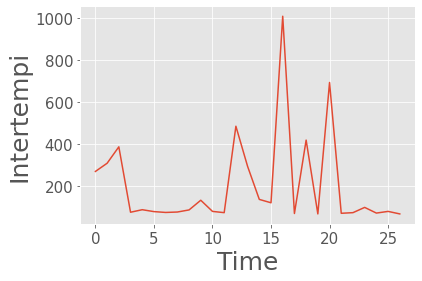

In [23]:
plt.plot(intertempi)
plt.ylabel('Intertempi')
plt.xlabel('Time');

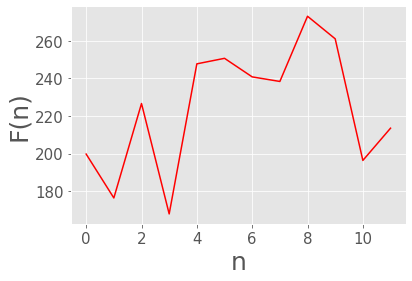

In [25]:
#maxlag =int(1000/20)
maxlag = int(len(intertempi)/2)
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(np.array(intertempi[n:])- np.array(intertempi[:-n]))))

#plt.xscale('log')
#plt.yscale('log')
plt.plot(np.arange(0,len(F),1), F,'r-')
plt.ylabel('F(n)');
plt.xlabel('n');
#myfit(np.log(np.arange(0,len(F),1)), np.log(F),1,10)

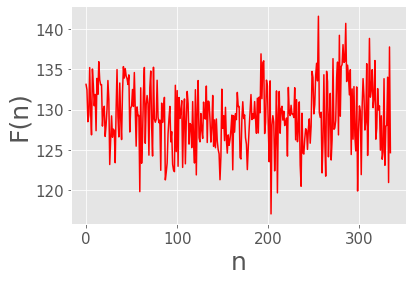

In [195]:
maxlag =int(1000/20)
maxlag = int(len(intertempi)/2)
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(np.array(intertempi[n:])- np.array(intertempi[:-n]))))

#plt.xscale('log')
#plt.yscale('log')
plt.plot(np.arange(0,len(F),1), F,'r-')
plt.ylabel('F(n)');
plt.xlabel('n');
#myfit(np.log(np.arange(0,len(F),1)), np.log(F),1,10)

In [294]:
# verificare se mi becca bene i punti in cui cambia la fase

def interpol(x1,y1,x2,y2,ystar):
    "retta che passa per due punti e si interseca con y = 0"
    return -y2*(x1-x2)/(y1-y2) + x2

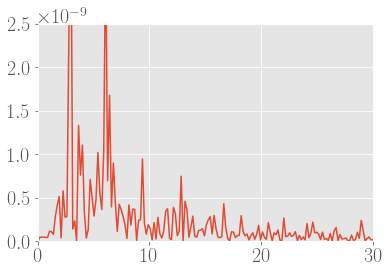

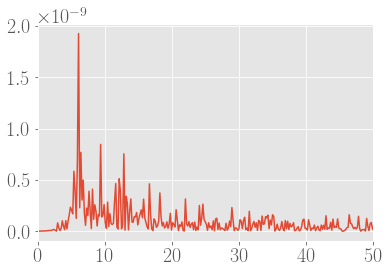

In [229]:
fs = 1/0.001
nqy = fs/2
down = 5/nqy
up = 100/nqy
a,b = signal.butter(2, [down,up], 'bandpass')
x,p = signal.periodogram(timeseries[0,4000:,50], fs = 1/0.001)
plt.plot(x,p)
plt.ylim(0,2.5*10**-9.)
plt.xlim(0,30)
plt.figure()
filtered = signal.filtfilt(a,b,timeseries[0,4000:,50])
x,p = signal.periodogram(filtered[:], fs = 1/0.001)
plt.plot(x,p)
plt.xlim(0,50)

plt.show()

In [65]:
timeseries.shape

(199700,)

# Metodo fasi

In [83]:


hil = signal.hilbert(timeseries[0,:,80])
phases = np.angle(hil)

prova = np.where(np.abs(phases) < 0.02)[0]
intertempis = (prova[1:] -prova[:-1]) 
len(intertempis)

68

(0.0, 1000.0)

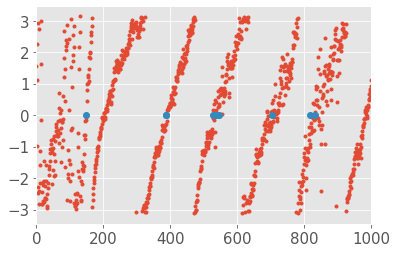

In [80]:
plt.plot(phases,'.')
plt.plot(prova, [0 for r in range(len(prova))], 'o')
plt.xlim(0,1000)

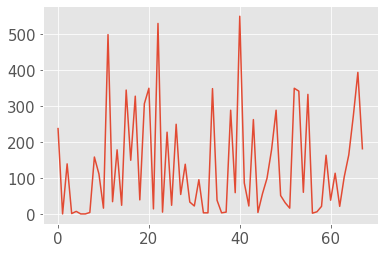

In [84]:
plt.plot(intertempis)

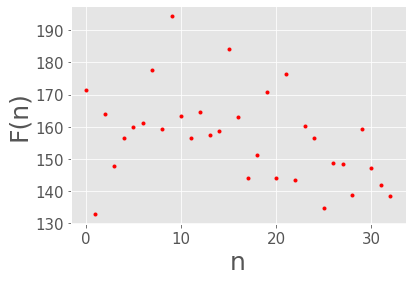

In [85]:
maxlag =int(len(intertempis)/2)
#intertempis = intertempis[1000:]
#intertempis = intertempis + x[:len(intertempis)]
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:]- intertempis[:-n])))
plt.plot(np.arange(0,len(F),1), F,'r.')
plt.ylabel('F(n)')
plt.xlabel('n');

#beta = myfit(np.log10(np.arange(0,len(F),1)), np.log10(F),100,1000)
#plt.plot(np.arange(0,len(F[100:1000]),1), np.arange(0,len(F[100:1000]),1)**beta[0]*10**beta[1], 'b-')
#plt.xscale('log')
#plt.yscale('log')

# Some control cases


# A pure oscillation

In [9]:
x = np.arange(0.,100000,0.001)
beta = 2 # the exponent
samples = len(x) # number of samples to generate
brown = cn.powerlaw_psd_gaussian(beta, samples)
#plt.plot(sin)
#plt.xlim(0,10000)

In [132]:
75/50, 5/3

(1.5, 1.6666666666666667)

In [46]:
x = np.arange(0.,100000,0.001)
sin = 1*np.sin(2*np.pi*(0.5)*x[:1000000])

In [351]:
248/ 62 ,1/3/1/5

(4.0, 0.06666666666666667)

(0.0, 10000.0)

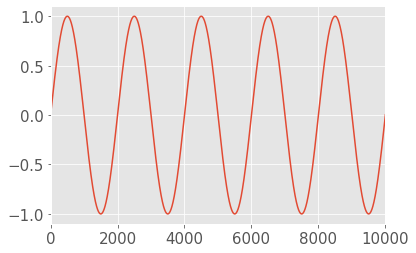

In [47]:
plt.plot(sin)
plt.xlim(0,10000)

[Text(0.5, 0, 'pp')]

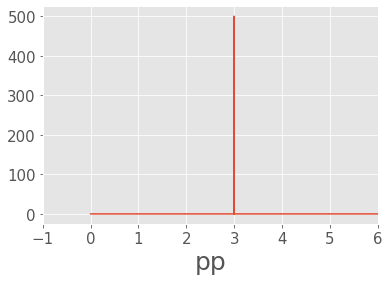

In [29]:
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
x,p = signal.periodogram(sin, fs = 1/0.001)
plt.plot(x,p)
plt.xlim(-1,6)
ax.set(xlabel = r"pp")

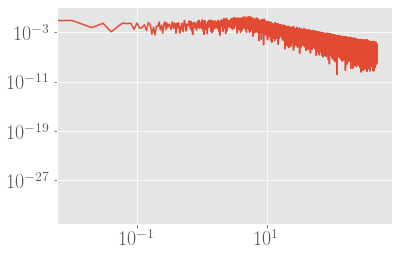

In [222]:
x,pxx = signal.periodogram(sin, fs = 1/0.001)
plt.plot(x,pxx)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(0,20)

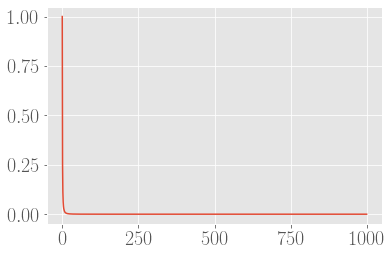

In [27]:
s = [1/x**2 for x in np.arange(1,1000,1)]
plt.plot(s)
f = np.fft.ifft(s)

(199700,)


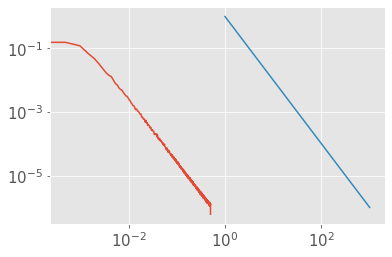

In [30]:
#  genera time series a partire da un certo spettro
# studiare
import numpy as np
from scipy.fftpack import fft, fftshift, ifftshift
from scipy.signal import welch
import pandas as pd
import matplotlib.pyplot as pl



def gen_phase(N):
    if N%2==0:
        raise ValueError('THis methofd requires a symmetric PSD, which can only be achieved with an odd number of data points')
    else:
        phase = np.zeros(N)
        randoms = np.random.random(size=int(N/2))*2*np.pi-np.pi
        phase[:int(N/2)] = randoms
        phase[int(N/2)+1:] = np.flipud(-randoms)
    return phase


def symmetrize_psd(psd):
    N = len(psd)
    symmetric = np.zeros(2*N-1)
    symmetric[0:N] = np.flipud(psd)
    symmetric[N:] = psd[1:]
    return symmetric

def scale_psd(psd, dt):
    N = len(psd)
    phase = gen_phase(N)
    A = np.sqrt(psd/(2*N*dt)) * np.exp(1j*phase)
    return ifftshift(A)

def get_timeseries(A):
    timeseries = np.fft.fft(A)
    return np.real(timeseries)


averages = 200

psd = [1/x**2 for x in np.arange(1,1000,1)]
fi = np.arange(1,1000,1)
sympsd = symmetrize_psd(psd)
N = len(sympsd)
averages = 100
timeseries = np.empty(N*averages)
print(timeseries.shape)
for i in range(averages):
    A = scale_psd(sympsd, 1)
    timeseries[i*N:(i+1)*N] = get_timeseries(A)


f, pxxr = signal.welch(np.real(timeseries), fs=1, nperseg=2**np.floor(np.log2(N)+1))
plt.loglog(f, pxxr)
plt.loglog(fi, psd)
plt.show()

## Autocorrelation function

In [59]:
autocorr = []
#i = 0
# autocorr diviso in finestre
maxlag = 100
for n in range(0,maxlag):
  autocorr.append([])
  i = 0
  while i + maxlag < len(sin):
    dataset = sin[i:i+maxlag]
    autocorr[n].append([dataset[n]*dataset[0], dataset[n], dataset[0]])
    i = i + 1
print(i)
    #np.mean(np.abs(prova[1+window:1+window+100:n] -prova[window:window +100:n] - (prova[window+1:1+window +100:] -prova[window:window +100:])))

99900


In [60]:
autocorr = np.array(autocorr)

In [61]:
auto = {}
for g in range(len(autocorr)):
    a,m1,m2 = np.mean(autocorr[g], axis = 0)
    s,s1,s2 = np.std(autocorr[g], axis = 0)
    auto[g] = (a-m1*m2)/(s1*s2)

In [70]:
len(aut)

1001

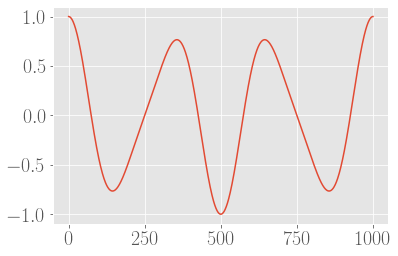

In [105]:
#plt.plot(aut)
plt.plot(myautocorr(sin,1001));
#plt.xlim(900,1000)

(0.0, 1000.0)

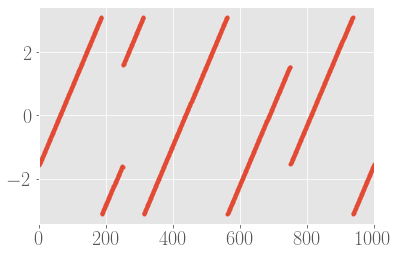

In [325]:


hil = signal.hilbert(sin, axis = 0)
phases = np.angle(hil)
plt.plot(phases, '.')
plt.xlim(0,1000, '.')

In [331]:
np.abs(phases).min()

0.012566370607927507

In [52]:


hil = signal.hilbert(sin, axis = 0)
phases = np.angle(hil)
#phases = phases[np.array([[0,1] for r in range(int(len(sin)/2))], dtype= bool).flatten()]
prova = np.where(np.abs(phases) < 0.002)[0]
#np.where(np.diff(np.sign(phases[:]))!=0)[0]


#print(prova.shape,np.array([[0,1] for r in range(int(len(prova)/2))], dtype= bool).flatten().shape)
#prova = prova[np.array([[0,1] for r in range(int(len(prova)/2))], dtype= bool).flatten()]
intertempis = (prova[:-1] -prova[1:]) 
len(intertempis)

499

x1 = np.where(np.sign(phases[:-1])!=np.sign(phases[1:]))[0]
x2 = x1 +1
prova2 = interpol(x1,phases[x1],x2,phases[x2], 0)
intertempis2 = (prova2[1:] -prova2[:-1]) 
len(intertempis2)

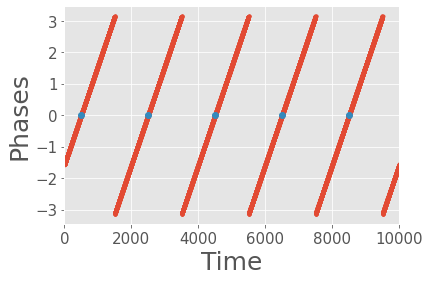

In [53]:
plt.plot(phases, '.')
plt.plot(prova, [ 0 for r in range(len(prova))], 'o')
plt.xlim(0,10000)
plt.ylabel('Phases')
plt.xlabel('Time');

In [57]:
1/(2000*0.001)

0.5

Text(0.5, 0, 'Time')

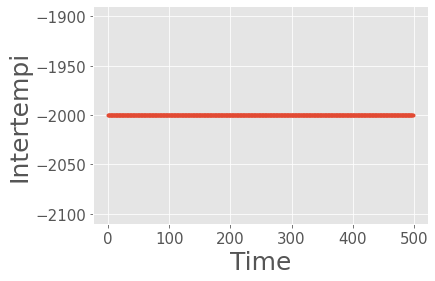

In [62]:
plt.plot(intertempis,'.')
plt.ylabel('Intertempi')
plt.xlabel('Time')
#(intertempis)

f = interp1d(np.arange(0,len(phases),1),phases, kind = 'linear', fill_value = True)
phases2 = f(np.arange(0,len(phases)-10,0.07))
#plt.plot(np.arange(0,len(phases)-10,0.07),f(np.arange(0,len(phases)-10,0.07)), '.')

prova = np.where(np.diff(np.sign(phases2[:]))!=0)[0]
newx = np.arange(0,len(phases)-10,0.07)


f = interp1d(np.arange(0,len(phases),1),phases, kind = 'linear', fill_value = True)
plt.plot(phases, 'k.')
plt.plot(np.arange(0,len(phases)-10,0.07),f(np.arange(0,len(phases)-10,0.07)), '.')
#plt.plot(prova+x[:20000], [0 for r in range(len(prova))], 'r.')
plt.plot(prova, [0 for r in range(len(prova))], 'b.') # brown noise su scale più grandi per il seno

#plt.xlim(0,100)

In [89]:
brownintertempis  = intertempis + brown[:len(intertempis)]

In [151]:
pinkintertempis  = intertempis + pink[:len(intertempis)]

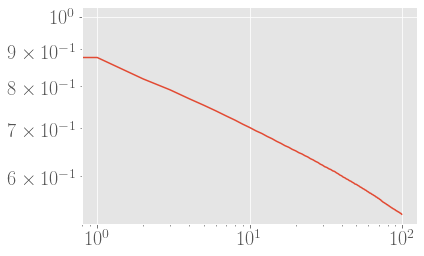

In [142]:
#plt.plot(pinkintertempis)
plt.loglog(myautocorr(pinkintertempis,100))

In [44]:
phases

array([-1.57079633, -1.5393804 , -1.50796447, ..., -1.66504411,
       -1.63362818, -1.60221225])

In [139]:
intertempis = (prova[1:] -prova[:-1]) 
new = np.zeros((len(intertempis)+1))
r = 0
i = 0
new[r] = 0
for i in range(1,len(intertempis)):
    new[i] = int(new[i-1] + np.array(intertempis + x[:len(intertempis)])[i])
   

In [97]:
newtimes =[]
newtimes.append(0)
for l in range(1,len(brownintertempis)+1):
    newtimes.append(newtimes[l-1]+brownintertempis[l-1])
    

In [152]:
newtimespink =[]
newtimespink.append(0)
for l in range(1,len(pinkintertempis)+1):
    newtimespink.append(newtimespink[l-1]+pinkintertempis[l-1])
    

In [153]:
newtimes  = np.array(newtimes)
newtimespink  = np.array(newtimespink)

-2.004567708288862


/home/benny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


(-2.004567708288862, -3.8059287663087753)

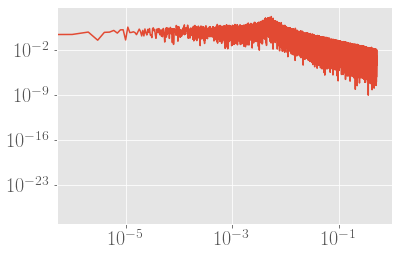

In [21]:
x,Pxx =signal.periodogram(sin)
plt.loglog(x,Pxx)
myfit(np.log10(x),np.log10(Pxx),1,len(x))

In [356]:
len(intertempis)

7999

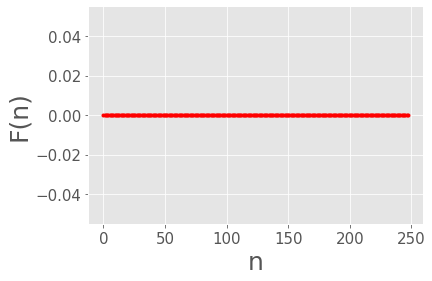

In [61]:
maxlag =int(len(intertempis)/2)
#intertempis = intertempis[1000:]
#intertempis = intertempis + x[:len(intertempis)]
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:]- intertempis[:-n])))
plt.plot(np.arange(0,len(F),1), F,'r.')
plt.ylabel('F(n)')
plt.xlabel('n');

#beta = myfit(np.log10(np.arange(0,len(F),1)), np.log10(F),100,1000)
#plt.plot(np.arange(0,len(F[100:1000]),1), np.arange(0,len(F[100:1000]),1)**beta[0]*10**beta[1], 'b-')
#plt.xscale('log')
#plt.yscale('log')

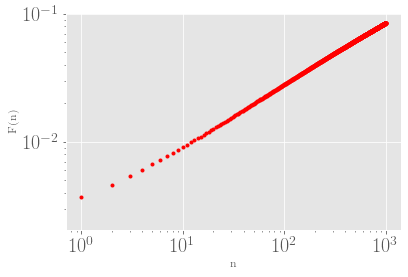

In [116]:
maxlag =1000
#intertempis = intertempis[1000:]
#intertempis = intertempis + x[:len(intertempis)]
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempi2[n:]- intertempi2[:-n])))
plt.plot(np.arange(0,len(F),1), F,'r.')
plt.ylabel('F(n)')
plt.xlabel('n')

#beta = myfit(np.log10(np.arange(0,len(F),1)), np.log10(F),100,1000)
#plt.plot(np.arange(0,len(F[100:1000]),1), np.arange(0,len(F[100:1000]),1)**beta[0]*10**beta[1], 'b-')

plt.xscale('log')
plt.yscale('log')

In [116]:
F = []
# diviso in finestre
#i = 0
maxlag = 1000
for n in range(0,maxlag):
  F.append([])
  i = 0
  while i + maxlag < len(intertempis):
    dataset = intertempis[i:i+maxlag]
    #print(len(dataset))
    F[n].append(dataset[n]-dataset[0])
    i = i + 1

In [117]:
F = np.array(F)
F.shape

(1000, 1999)

In [118]:
F2 ={}
for r in range(len(F)):
    F2[r] = np.mean(np.abs(F[r]))

Text(0.5, 0, 'n')

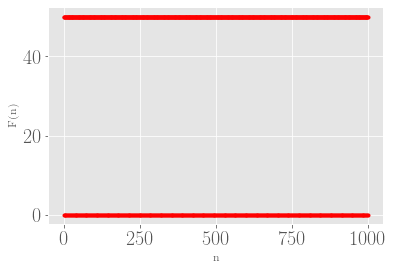

In [120]:
plt.plot(np.arange(0,len(F2.values()),1),F2.values(), 'r.')

plt.ylabel('F(n)')
plt.xlabel('n')
#plt.xscale('log')
#plt.yscale('log')

In [123]:
F2.values();

In [475]:
fit = sm.OLS( np.log(F1[1:]),np.vstack((np.ones(len(F1[1:])),np.log(np.arange(1,windowlength)[1:]))).T).fit()
#,np.log(F.values()[1:])

In [474]:
F1 = pd.DataFrame(F.values()).values

In [440]:
np.vstack((np.ones(len(F1[1:])),np.log(np.arange(1,windowlength)[1:])));

In [285]:
len(x)

501

/home/benny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/home/benny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


Beta = -0.05245481156030682
alpha = 0.5262274057801534
Beta = 0.9407324524908256
alpha = 0.0296337737545872


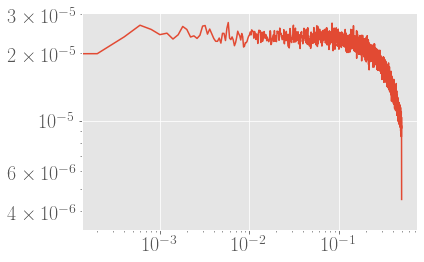

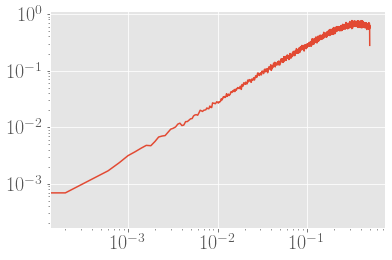

In [288]:
I = brown[1:]- brown[:-1]
x,p = signal.welch(I, nperseg = 5000)
plt.loglog(x,p)
beta = myfit(np.log10(x), np.log10(p),100,1000)
print(f'alpha = {(1-beta[0])/2}')
plt.figure()
I = pink[1:]- pink[:-1]
x,p = signal.welch(I, nperseg= 5000)
plt.loglog(x,p)
beta = myfit(np.log10(x), np.log10(p),100,1000)
#plt.ylim(10**-10,10**-1)
print(f'alpha = {(1-beta[0])/2}')
# also anticorrelation properties

# Ornstein Uhlenbeck process 

In [6]:
T = 8000
dt = 0.001
N = int(T/dt)

In [7]:
x = np.zeros(N)
for r in range(N-1):
    x[r+1] = x[r] -x[r]/0.05*dt+np.sqrt(dt)*np.random.normal()

## Identifying peaks

In [16]:
fs = 1/0.001
nqy = fs/2
down = 15/nqy
up = 100/nqy
a,b = signal.butter(2, down, 'highpass')
filtered = signal.filtfilt(a,b,x)

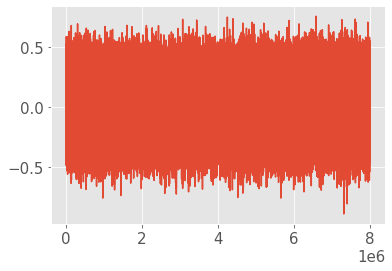

In [88]:
plt.plot(x)

(0.0, 10000.0)

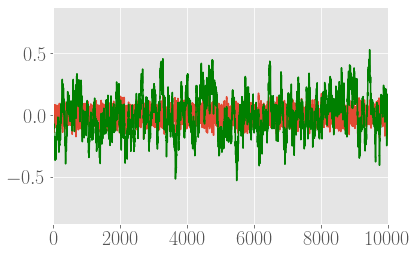

In [102]:
plt.plot(filtered)
plt.plot(x, 'g')
plt.xlim(0,10000)

In [13]:
cd '/home/benny/Desktop/Github/Criticality-in-barrel-cortex/'

/home/benny/Desktop/Github/Criticality-in-barrel-cortex


In [14]:
from valanghe import *

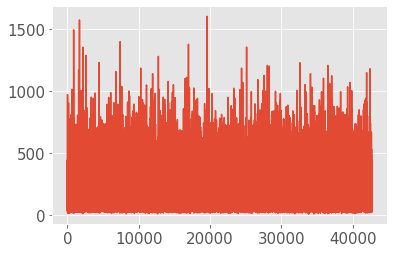

In [25]:
binary = threshold(x,np.mean(x), np.std(x),1, "neg")
tempi = np.where(binary>0)[0]

inter = np.diff(tempi)
plt.plot(inter)
#myfit(np.log(np.arange(0,len(F),1)), np.log(F),1,1

In [104]:
len(inter)

287279

(0.0, 10000.0)

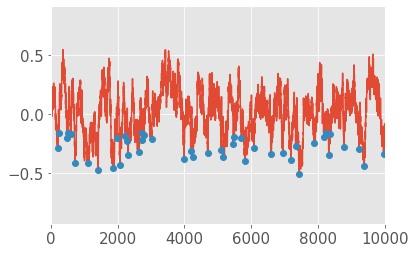

In [27]:
plt.plot(x)
plt.plot(np.arange(0,len(x),1)[binary > 0 ], x[binary > 0], 'o')
plt.xlim(0,10000)

In [28]:
maxlag =10000
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(inter[n:]- inter[:-n])))


Text(0.5, 0, 'n')

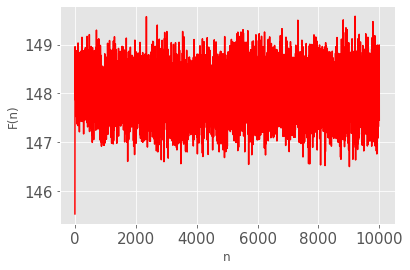

In [29]:

plt.plot(np.arange(0,len(F),1), F,'r-')
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('F(n)')
plt.xlabel('n')

In [32]:
mean = 0
std = 1
num_samples = 100000
x = np.random.normal(mean, std, size=num_samples)

In [68]:
a = myautocorr(v, 100)
a2 = myautocorr(v2, 100)
#a = myautocorr(v, 100)
a3 = myautocorr(v3, 100)

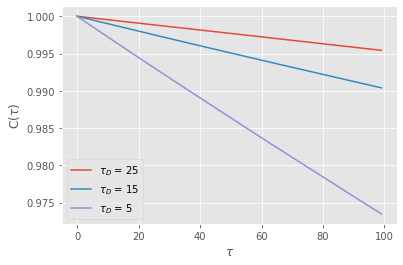

In [71]:
x = np.zeros(N)
tau = 25
Dstar =.3
for r in range(N-1):
    x[r+1] = x[r] -x[r]/tau*dt+np.sqrt(dt)*np.random.normal()
    
new1 = x.copy()
new1[x<Dstar] = Dstar


x = np.zeros(N)
tau = 15
Dstar =.3
for r in range(N-1):
    x[r+1] = x[r] -x[r]/tau*dt+np.sqrt(dt)*np.random.normal()
    
new2= x.copy()
new2[x<Dstar] = Dstar


x = np.zeros(N)
tau = 5
Dstar =.3
for r in range(N-1):
    x[r+1] = x[r] -x[r]/tau*dt+np.sqrt(dt)*np.random.normal()
    
new3= x.copy()
new3[x<Dstar] = Dstar




In [ ]:
v

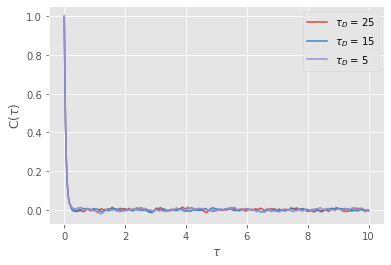

In [74]:
a = myautocorr(v, 10000)

a2 = myautocorr(v2, 10000)
#a = myautocorr(v, 100)
a3 = myautocorr(v3, 10000)


In [56]:
len(a)

100

ValueError: x and y must have same first dimension, but have shapes (10000,) and (100,)

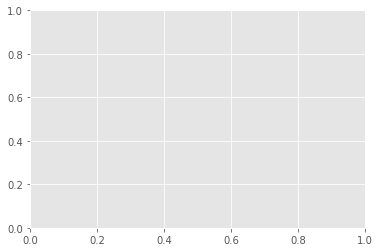

In [55]:
plt.plot(np.arange(0,10,.001),a, label = r'$\tau_D$ = 15')
plt.plot(np.arange(0,10,.001),a2, label = r'$\tau_D$ = 5')
plt.plot(np.arange(0,10,.001),a3, label = r'$\tau_D$ = 25')

plt.ylabel(r'C($\tau$)')
plt.xlabel(r'$\tau$');
plt.xscale('log')
plt.xlim(0,10)
plt.legend()

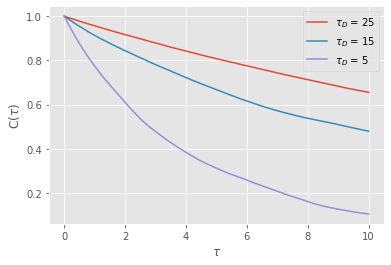

In [73]:
a = myautocorr(new1, 10000)

a2 = myautocorr(new2, 10000)
#a = myautocorr(v, 100)
a3 = myautocorr(new3, 10000)
plt.plot(np.arange(0,10,.001),a, label = r'$\tau_D$ = 25')
plt.plot(np.arange(0,10,.001),a2, label = r'$\tau_D$ = 15')
plt.plot(np.arange(0,10,.001),a3, label = r'$\tau_D$ = 5')

plt.ylabel(r'C($\tau$)')
plt.xlabel(r'$\tau$');
plt.legend()

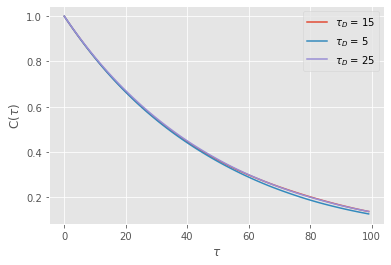

In [70]:
plt.plot(np.arange(0,10,.001),a, label = r'$\tau_D$ = 15')
plt.plot(np.arange(0,10,.001),a2, label = r'$\tau_D$ = 5')
plt.plot(np.arange(0,10,.001),a3, label = r'$\tau_D$ = 25')

plt.ylabel(r'C($\tau$)')
plt.xlabel(r'$\tau$');
plt.legend()

In [57]:
new

NameError: name 'new' is not defined

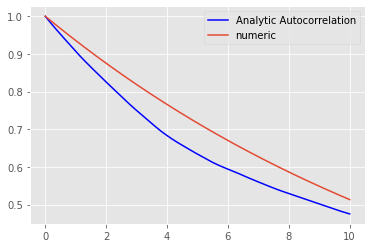

In [16]:
#plt.plot(a)
tau =15
plt.plot(np.arange(0,10,.001),a, 'b-', label ='Analytic Autocorrelation')
plt.plot(np.arange(0,10,.001),np.exp(-np.arange(0,10,.001)/tau), label = 'numeric')
plt.legend()

In [ ]:
pwlnoise = power_law_noise(100000000, alpha=1, var=1)

In [280]:
df1 = 1

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


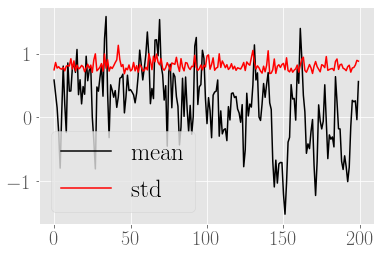

In [292]:
scale = 5000
# per vedere se sono stazionari
m,s = [],[]
shape = (pink.shape[0]//scale, scale)
X = np.lib.stride_tricks.as_strided(pink,shape=shape)
for g in range(len(X)):
    m.append(np.mean(X[g]))
    s.append(np.std(X[g]))
plt.plot(m, 'k', label ='mean')
plt.plot(s,'r', label = 'std')
plt.legend()

# Metodo fasi

In [21]:


hil = signal.hilbert(x, axis = 0)
phases = np.angle(hil)
#phases = phases[np.array([[0,1] for r in range(int(len(sin)/2))], dtype= bool).flatten()]
prova = np.where(np.abs(phases) < 0.02)[0]
#np.where(np.diff(np.sign(phases[:]))!=0)[0]

In [16]:
plt.style.use('ggplot')

(0.0, 1000.0)

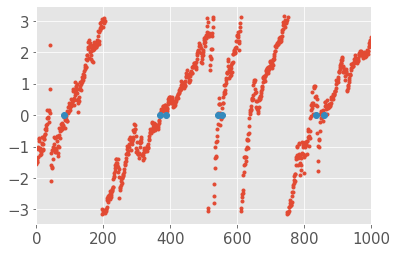

In [22]:
plt.plot(phases,'.')
plt.plot(prova,[0 for r in range(len(prova))], 'o')
plt.xlim(0,1000)

In [23]:


#print(prova.shape,np.array([[0,1] for r in range(int(len(prova)/2))], dtype= bool).flatten().shape)
#prova = prova[np.array([[0,1] for r in range(int(len(prova)/2))], dtype= bool).flatten()]
intertempis = (prova[:-1] -prova[1:]) 
len(intertempis)

51356

Text(0.5, 0, 'n')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


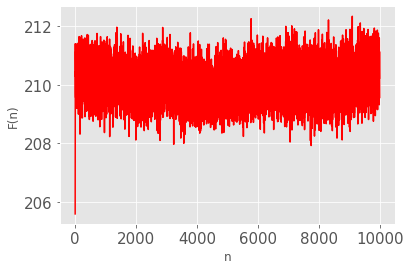

In [24]:
maxlag =10000
F = [[] for r in range(1,maxlag)]
for n in range(1,maxlag):
    F[n-1].append(np.mean(np.abs(intertempis[n:]- intertempis[:-n])))
    
plt.plot(np.arange(0,len(F),1), F,'r-')
plt.ylabel('F(n)')
plt.xlabel('n')

(1960, 17647)


Text(0.5, 0, 'n')

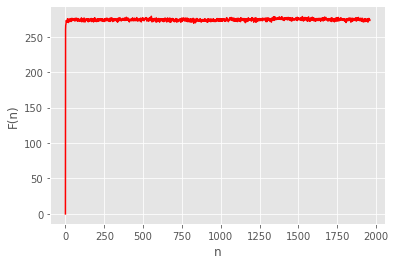

In [26]:
F = []
# diviso in finestre
#i = 0
maxlag = 1960
for n in range(0,maxlag):
  F.append([])
  i = 0
  while i + maxlag < len(intertempis):
    dataset = intertempis[i:i+maxlag]
    #print(len(dataset))
    F[n].append(dataset[n]-dataset[0])
    i = i + 1

F = np.array(F)
print(F.shape)

F2 ={}
for r in range(len(F)):
    F2[r] = np.mean(np.abs(F[r]))

plt.plot(np.arange(0,len(F2.values()),1),F2.values(), 'r-')

plt.ylabel('F(n)')
plt.xlabel('n')

## Detrended fluctuation analysis

In [90]:
from dfa import *
from generate import *

In [91]:
lista = [r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_001.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_002.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_003.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_004.bin",
         r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_005.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_006.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_007.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_008.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_009.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_010.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_011.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_012.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_013.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_014.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_015.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_016.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_017.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_018.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_019.bin",
        r"/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/ISI_2s_1st_pyton_sf976.5625_020.bin"]

timeseries =[]
for k in range(20):
    path = lista[k]
    width = 4    #columns
    heigth = 64   #rows
    nframes = 2000  #load  only some frames
    #n_words_to_load = heigth * width  * nframes
    n_words_to_load = -1  #load  all frames 
    raw = np.fromfile( path, dtype=np.double, count = n_words_to_load)  # count = -1 to load all data
    a = np.reshape(raw, (-1, width, heigth))
    a1 = []
    
    for z in range(9764):
        a1.append(np.delete(a[z],(0,1,2,3,4,5,6,7,8), axis = 1).transpose().tolist())
   
    a1 = np.asarray(a1)
    a1 = a1.reshape(-1,220)
    timeseries.append(a1)
    
timeseries = np.array(timeseries)
timeseries[:,:,60] = np.mean(timeseries, axis = 2)

In [12]:
plt.style.use('ggplot')

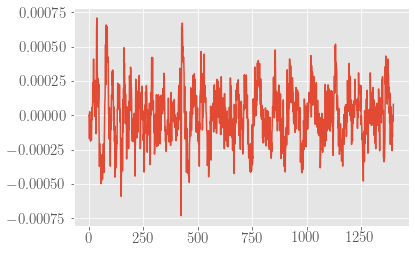

In [13]:
plt.plot(timeseries[10,:7000:5,130]);

In [16]:
cd '/home/benny/Desktop/Github/Oscillations analysis/'

/home/benny/Desktop/Github/Oscillations analysis


In [17]:
from dfa import *
from generate import *

In [137]:
2**np.arange(8,12,0.25)

array([ 256.        ,  304.43702144,  362.03867197,  430.53896461,
        512.        ,  608.87404288,  724.07734394,  861.07792922,
       1024.        , 1217.74808576, 1448.15468787, 1722.15585844,
       2048.        , 2435.49617153, 2896.30937574, 3444.31171688])

Window length:  256  Number of windows:  19
Window length:  304  Number of windows:  19
Window length:  362  Number of windows:  19
Window length:  430  Number of windows:  19
Window length:  512  Number of windows:  19
Window length:  608  Number of windows:  19
Window length:  724  Number of windows:  19
Window length:  861  Number of windows:  19
Window length:  1024  Number of windows:  19
Window length:  1217  Number of windows:  19
Window length:  1448  Number of windows:  19
Window length:  1722  Number of windows:  19
Window length:  2048  Number of windows:  19
Window length:  2435  Number of windows:  19
Window length:  2896  Number of windows:  19
Window length:  3444  Number of windows:  19


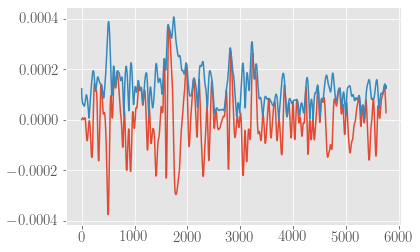

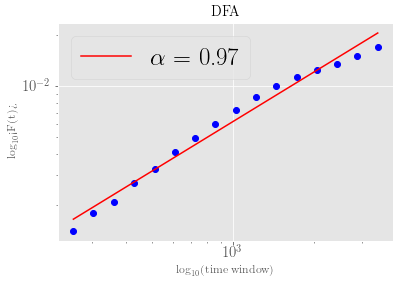

DFA exponent 0.9712860452267968


In [19]:
from scipy import signal
fs = 1/(10/9764)
nqy = fs/2
down = 8
up = 14
m=signal.firwin(100, [8,14],pass_zero = False, fs = fs)
#a,b = signal.butter(2,[down/nqy,up/nqy], btype ='bandpass')
x = signal.filtfilt(m,1,timeseries[10,4000:,180])
#x = timeseries[10,4000:,80]
plt.plot(x)
x = np.abs(signal.hilbert(x))
plt.plot(x)
plt.figure()
scales, fluct, esta = dfawithoverlap(x,show=1, scale_lim = [8,12])

## studiarmi bene questi parametri
print("DFA exponent {}".format(esta))

In [26]:
plt.rcParams['text.usetex'] = False

Window length:  256  Number of windows:  32
Window length:  304  Number of windows:  32
Window length:  362  Number of windows:  32
Window length:  430  Number of windows:  32
Window length:  512  Number of windows:  32
Window length:  608  Number of windows:  32
Window length:  724  Number of windows:  32
Window length:  861  Number of windows:  32
Window length:  1024  Number of windows:  32
Window length:  1217  Number of windows:  32
Window length:  1448  Number of windows:  32
Window length:  1722  Number of windows:  32


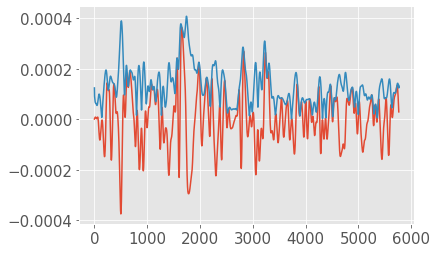

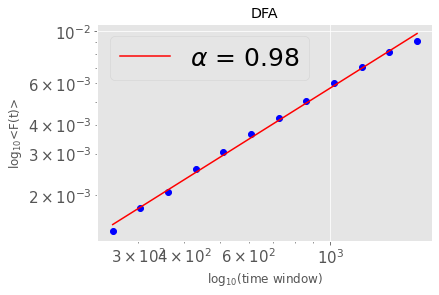

DFA exponent 0.9839324047178906


In [44]:
from scipy import signal
fs = 1/(10/9764)
nqy = fs/2
down = 8
up = 14
m=signal.firwin(100, [8,14],pass_zero = False, fs = fs)
#a,b = signal.butter(2,[down/nqy,up/nqy], btype ='bandpass')
x = signal.filtfilt(m,1,timeseries[10,4000:,180])
#x = timeseries[10,4000:,80]
plt.plot(x)
x = np.abs(signal.hilbert(x))
plt.plot(x)
plt.figure()
scales, fluct, esta = dfawithoverlap(x,show=1, scale_lim = [8,11], overlap = 50)

## studiarmi bene questi parametri
print("DFA exponent {}".format(esta))

Window length:  256  Number of windows:  18
Window length:  304  Number of windows:  18
Window length:  362  Number of windows:  18
Window length:  430  Number of windows:  18
Window length:  512  Number of windows:  18
Window length:  608  Number of windows:  18
Window length:  724  Number of windows:  18
Window length:  861  Number of windows:  18
Window length:  1024  Number of windows:  18
Window length:  1217  Number of windows:  18
Window length:  1448  Number of windows:  18
Window length:  1722  Number of windows:  18


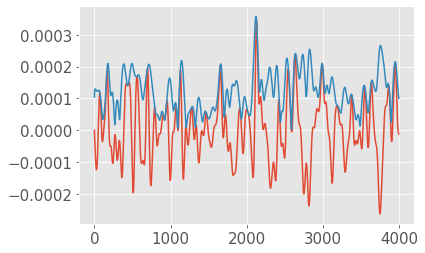

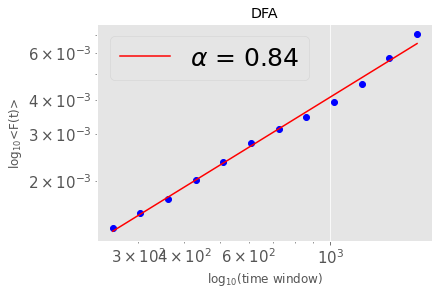

DFA exponent 0.8423198262500405


In [42]:
from scipy import signal
fs = 1/(10/9764)
nqy = fs/2
down = 8
up = 14
m=signal.firwin(100, [8,14],pass_zero = False, fs = fs)
#a,b = signal.butter(2,[down/nqy,up/nqy], btype ='bandpass')
x = signal.filtfilt(m,1,timeseries[10,:4000,180])
#x = timeseries[10,4000:,80]
plt.plot(x)
x = np.abs(signal.hilbert(x))
plt.plot(x)
plt.figure()
scales, fluct, esta = dfawithoverlap(x,show=1, scale_lim = [8,11], overlap = 50)

## studiarmi bene questi parametri
print("DFA exponent {}".format(esta))

Window length:  256  Number of windows:  32
Window length:  304  Number of windows:  32
Window length:  362  Number of windows:  32
Window length:  430  Number of windows:  32
Window length:  512  Number of windows:  32
Window length:  608  Number of windows:  32
Window length:  724  Number of windows:  32
Window length:  861  Number of windows:  32
Window length:  1024  Number of windows:  32
Window length:  1217  Number of windows:  32
Window length:  1448  Number of windows:  32
Window length:  1722  Number of windows:  32


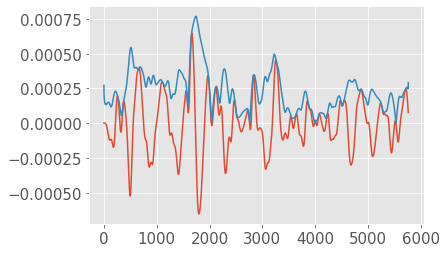

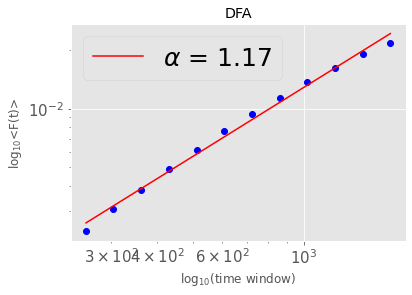

DFA exponent 1.17324160933964


In [45]:
from scipy import signal
fs = 1/(10/9764)
nqy = fs/2
down = 8
up = 14
m=signal.firwin(100, [5,7],pass_zero = False, fs = fs)
#a,b = signal.butter(2,[down/nqy,up/nqy], btype ='bandpass')
x = signal.filtfilt(m,1,timeseries[10,4000:,180])
#x = timeseries[10,4000:,80]
plt.plot(x)
x = np.abs(signal.hilbert(x))
plt.plot(x)
plt.figure()
scales, fluct, esta = dfawithoverlap(x,show=1, scale_lim = [8,11], overlap = 50)

## studiarmi bene questi parametri
print("DFA exponent {}".format(esta))

Window length:  256  Number of windows:  18
Window length:  304  Number of windows:  18
Window length:  362  Number of windows:  18
Window length:  430  Number of windows:  18
Window length:  512  Number of windows:  18
Window length:  608  Number of windows:  18
Window length:  724  Number of windows:  18
Window length:  861  Number of windows:  18
Window length:  1024  Number of windows:  18
Window length:  1217  Number of windows:  18
Window length:  1448  Number of windows:  18
Window length:  1722  Number of windows:  18


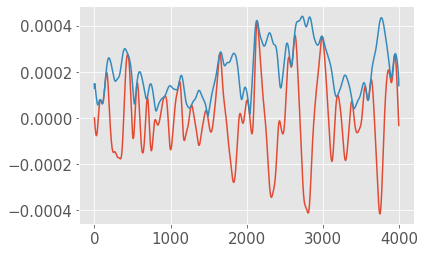

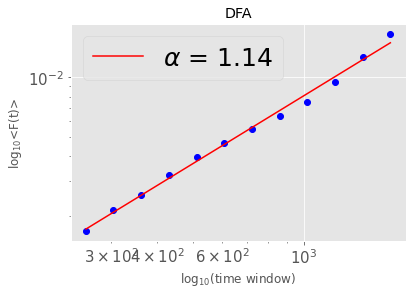

DFA exponent 1.137081399107694


In [46]:
from scipy import signal
fs = 1/(10/9764)
nqy = fs/2
down = 8
up = 14
m=signal.firwin(100, [5,7],pass_zero = False, fs = fs)
#a,b = signal.butter(2,[down/nqy,up/nqy], btype ='bandpass')
x = signal.filtfilt(m,1,timeseries[10,:4000,180])
#x = timeseries[10,4000:,80]
plt.plot(x)
x = np.abs(signal.hilbert(x))
plt.plot(x)
plt.figure()
scales, fluct, esta = dfawithoverlap(x,show=1, scale_lim = [8,11], overlap = 50)

## studiarmi bene questi parametri
print("DFA exponent {}".format(esta))

Window length:  512  Number of windows:  195
Window length:  608  Number of windows:  164
Window length:  724  Number of windows:  138
Window length:  861  Number of windows:  116
Window length:  1024  Number of windows:  97
Window length:  1217  Number of windows:  82
Window length:  1448  Number of windows:  69
Window length:  1722  Number of windows:  58
Window length:  2048  Number of windows:  48
Window length:  2435  Number of windows:  41
Window length:  2896  Number of windows:  34
Window length:  3444  Number of windows:  29
Window length:  4096  Number of windows:  24
Window length:  4870  Number of windows:  20
Window length:  5792  Number of windows:  17
Window length:  6888  Number of windows:  14
Window length:  8192  Number of windows:  12
Window length:  9741  Number of windows:  10
Window length:  11585  Number of windows:  8
Window length:  13777  Number of windows:  7
Window length:  16384  Number of windows:  6
Window length:  19483  Number of windows:  5
Window len

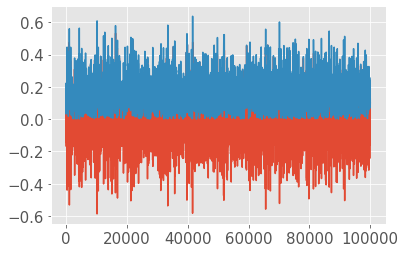

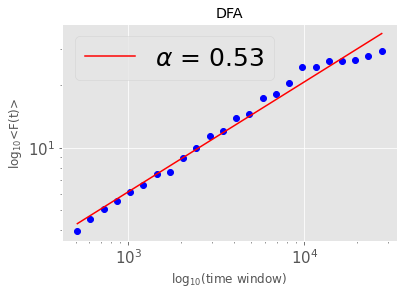

DFA exponent 0.5302562888558396


In [43]:
mean = 0
std = 1 
num_samples = 100000
fs = 1/(10/9764)
nqy = fs/2
down = 8
up =14
samples = np.random.normal(mean, std, size=num_samples)
#a,b = signal.butter(2,[down/nqy,up/nqy], btype ='bandpass')
#x = signal.filtfilt(a,b,samples)
m=signal.firwin(100, [8,14],pass_zero = False, fs = fs)
#a,b = signal.butter(2,[down/nqy,up/nqy], btype ='bandpass')
x = signal.filtfilt(m,1,samples)
plt.plot(x)
x = np.abs(signal.hilbert(x))
plt.plot(x)
#n = 2**12
#dfa_alpha = 0.7
#x = power_law_noise(n, dfa_alpha)
plt.figure()
scales, fluct, esta = dfa(x,show=1, scale_lim = [9,15])
print("DFA exponent {}".format(esta))

Window length:  256  Number of windows:  32
Window length:  304  Number of windows:  32
Window length:  362  Number of windows:  32
Window length:  430  Number of windows:  32
Window length:  512  Number of windows:  32
Window length:  608  Number of windows:  32
Window length:  724  Number of windows:  32
Window length:  861  Number of windows:  32
Window length:  1024  Number of windows:  32
Window length:  1217  Number of windows:  32
Window length:  1448  Number of windows:  32
Window length:  1722  Number of windows:  32


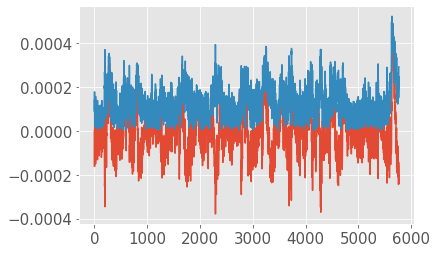

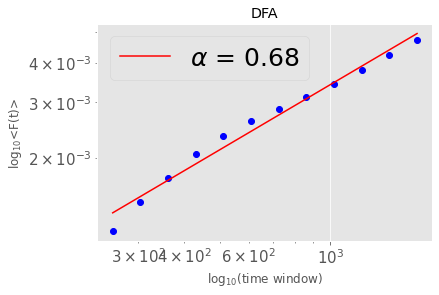

DFA exponent 0.6844009070194282


In [35]:
from scipy import signal
fs = 1/(10/9764)
nqy = fs/2
down = 8
up = 14
m=signal.firwin(100, [8,14],pass_zero = False, fs = fs)
#a,b = signal.butter(2,[down/nqy,up/nqy], btype ='bandpass')
#x = signal.filtfilt(m,1,timeseries[10,4000:,180])
x = timeseries[10,4000:,61]
plt.plot(x)
x = np.abs(signal.hilbert(x))
plt.plot(x)
plt.figure()
scales, fluct, esta = dfawithoverlap(x,show=1, scale_lim = [8,11], overlap = 50)

## studiarmi bene questi parametri
print("DFA exponent {}".format(esta))

Window length:  256  Number of windows:  18
Window length:  304  Number of windows:  18
Window length:  362  Number of windows:  18
Window length:  430  Number of windows:  18
Window length:  512  Number of windows:  18
Window length:  608  Number of windows:  18
Window length:  724  Number of windows:  18
Window length:  861  Number of windows:  18
Window length:  1024  Number of windows:  18
Window length:  1217  Number of windows:  18
Window length:  1448  Number of windows:  18
Window length:  1722  Number of windows:  18


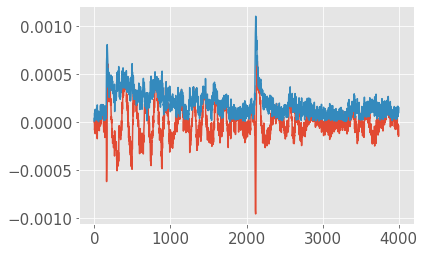

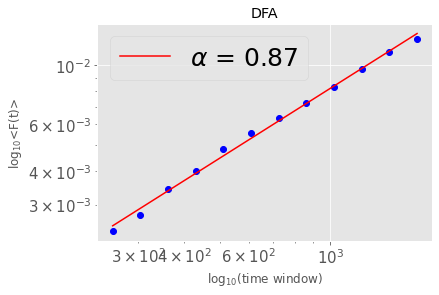

DFA exponent 0.8724221390578848


In [34]:
from scipy import signal
fs = 1/(10/9764)
nqy = fs/2
down = 8
up = 14
m=signal.firwin(100, [8,14],pass_zero = False, fs = fs)
#a,b = signal.butter(2,[down/nqy,up/nqy], btype ='bandpass')
#x = signal.filtfilt(m,1,timeseries[10,:4000,180])
x = timeseries[10,:4000,61]
plt.plot(x)
x = np.abs(signal.hilbert(x))
plt.plot(x)
plt.figure()
scales, fluct, esta = dfawithoverlap(x,show=1, scale_lim = [8,11], overlap = 50)

## studiarmi bene questi parametri
print("DFA exponent {}".format(esta))

Window length:  512  Number of windows:  283
Window length:  608  Number of windows:  283
Window length:  724  Number of windows:  283
Window length:  861  Number of windows:  283
Window length:  1024  Number of windows:  283
Window length:  1217  Number of windows:  283
Window length:  1448  Number of windows:  283
Window length:  1722  Number of windows:  283
Window length:  2048  Number of windows:  283
Window length:  2435  Number of windows:  283
Window length:  2896  Number of windows:  283
Window length:  3444  Number of windows:  283
Window length:  4096  Number of windows:  283
Window length:  4870  Number of windows:  283
Window length:  5792  Number of windows:  283
Window length:  6888  Number of windows:  283
Window length:  8192  Number of windows:  283
Window length:  9741  Number of windows:  283
Window length:  11585  Number of windows:  283
Window length:  13777  Number of windows:  283
Window length:  16384  Number of windows:  283
Window length:  19483  Number of wi

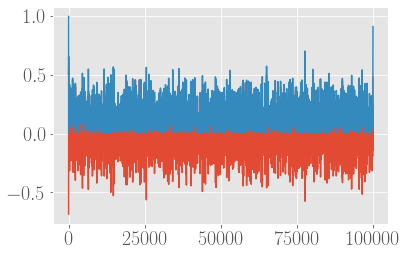

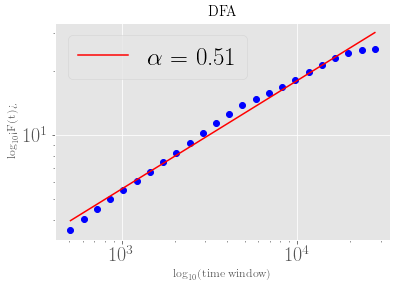

DFA exponent 0.5094185561938528


In [109]:
mean = 0
std = 1 
num_samples = 100000
fs = 1/(10/9764)
nqy = fs/2
down = 8
up =14
samples = np.random.normal(mean, std, size=num_samples)
#a,b = signal.butter(2,[down/nqy,up/nqy], btype ='bandpass')
#x = signal.filtfilt(a,b,samples)
m=signal.firwin(100, [8,14],pass_zero = False, fs = fs)
#a,b = signal.butter(2,[down/nqy,up/nqy], btype ='bandpass')
x = signal.filtfilt(m,1,samples)
plt.plot(x)
x = np.abs(signal.hilbert(x))
plt.plot(x)
#n = 2**12
#dfa_alpha = 0.7
#x = power_law_noise(n, dfa_alpha)
plt.figure()
scales, fluct, esta = dfawithoverlap(x,show=1, scale_lim = [9,15], overlap = 50)
print("DFA exponent {}".format(esta))